<a href="https://colab.research.google.com/github/poojapotdar38/EDA--Hotel-Bookings/blob/main/EDA_ON_Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

Data Preparation and Cleaning
The first step is to import the main libraries that we will use for this project.


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")
     

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Hotel Bookings.csv")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
len(df.index)

119390

In [ ]:
df.shape

(119390, 32)

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

We can see that we have 4 columns with missing values. Lets check these values as percentages.


In [ ]:
df.isnull().sum()/len(df.index)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

The columns “agent” and “company” have a high percentage of missing values. As these columns won’t be relevant for our analysis, we can delete them.

In [ ]:
df=df.drop(['agent','company'],axis=1) # We delete agent and company columns

The columns “children” and “country” have a low percentage of missing values. We will remove the full row on missing cells.


In [ ]:
df = df.dropna(axis = 0) # We delete rows with empty cells

Now we will drop the days_in_waiting_list column because we won’t use it for this analysis



In [ ]:
df = df.drop(labels='days_in_waiting_list', axis=1) # We delete days_in_waiting_list column

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

now we don’t have any missing value

In [ ]:
df.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,5400.000000,8.000000,5.000000


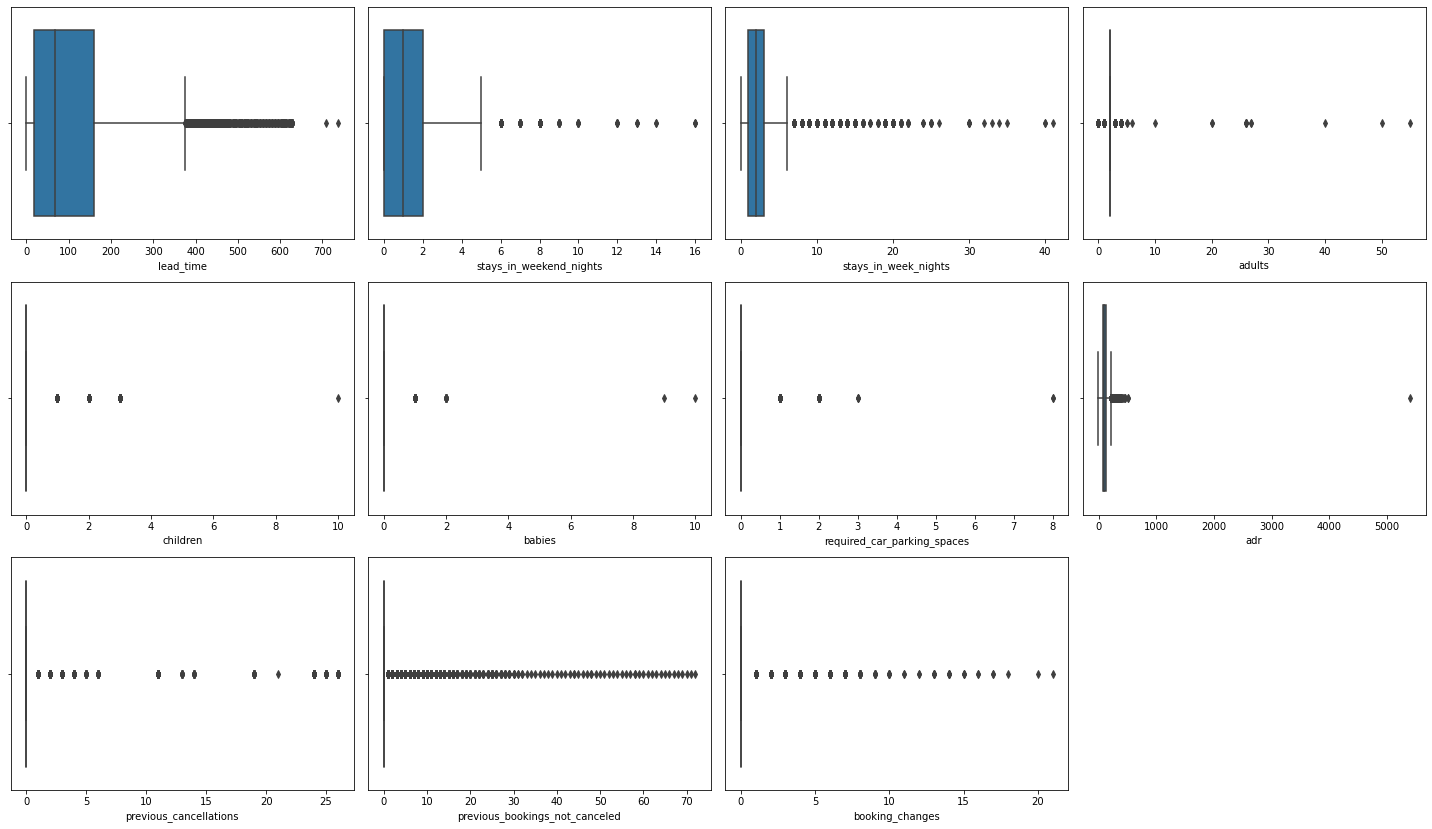

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1
plt.figure(figsize=(20,15))

for column in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df[column])
  plt.tight_layout()

here are some outliers so 
We remove the outliers by using conditionals to get and update these values.



In [ ]:
df.loc[df.lead_time > 500, 'lead_time'] = 500
df.loc[df.stays_in_weekend_nights >=  5, 'stays_in_weekend_nights'] = 5
df.loc[df.adults > 4, 'adults'] = 4
df.loc[df.previous_bookings_not_canceled > 0, 'previous_bookings_not_canceled'] = 1
df.loc[df.previous_cancellations > 0, 'previous_cancellations'] = 1
df.loc[df.stays_in_week_nights > 10, 'stays_in_week_nights'] = 10
df.loc[df.booking_changes > 5, 'booking_changes'] = 5
df.loc[df.babies > 8, 'babies'] = 0
df.loc[df.required_car_parking_spaces > 5, 'required_car_parking_spaces'] = 0
df.loc[df.children > 8, 'children'] = 0
df.loc[df.adr > 1000, 'adr'] = 1000




We removed the outliers. Our data is clean now.



Lets merge ‘children’ and ‘babies’ columns into ‘kids’ column.

In [ ]:
df['kids'] = df.children + df.babies

#Combine total mumbers by adding kids and adults
df['total_members'] = df.kids + df.adults
#convert the datatypes to string
df['arrival_date_year'] = df['arrival_date_year'].astype('str')
df['arrival_date_month'] = df['arrival_date_month'].astype('str')
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].astype('str')
df['is_canceled'] = df['is_canceled'].astype('str')
df['is_repeated_guest'] = df['is_repeated_guest'].astype('str')

In [ ]:
df['arrival_date'] = df['arrival_date_day_of_month'] + '-' + df['arrival_date_month'] + '-' + df['arrival_date_year']
df['arrival_date'] = pd.to_datetime(df['arrival_date'], errors='coerce')

Lets see how many confirmed bookings per month there are


In [ ]:
import datetime as dt

confirmed_bookings = df[df.is_canceled=='0']

confirmed_bookings['arrival_date_month'] = df['arrival_date'].dt.month
final=confirmed_bookings['arrival_date_month'].value_counts().sort_index()
final

1     4068
2     5317
3     6591
4     6533
5     7102
6     6393
7     7892
8     8618
9     6367
10    6867
11    4632
12    4365
Name: arrival_date_month, dtype: int64

Now lets check the cancelled bookings


In [ ]:
print('Total Bookings cancelled')
print(df.is_canceled.value_counts())
print('Cancelation percentage')
print(df.is_canceled.value_counts(normalize=True))

Total Bookings cancelled
0    74745
1    44153
Name: is_canceled, dtype: int64
Cancelation percentage
0    0.628648
1    0.371352
Name: is_canceled, dtype: float64


During the year, we have a 37.13% of cancelations.
Now lets plot this result.

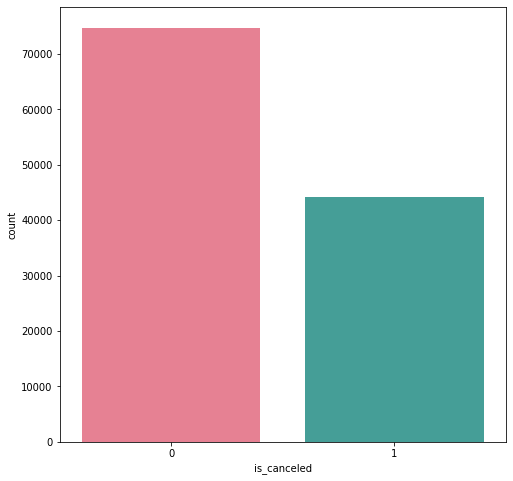

In [ ]:
plt.figure(figsize=(8,8))

#Canceled=1, Not canceled= 0
sns.countplot(df['is_canceled'], palette='husl')
plt.show()

Here we will check the country of origin. Categories are represented in the ISO 3155–3:2013 format.

In [ ]:
df.country.value_counts(normalize=True)

PRT    0.408636
GBR    0.102012
FRA    0.087596
ESP    0.072062
DEU    0.061288
         ...   
DJI    0.000008
BWA    0.000008
HND    0.000008
VGB    0.000008
NAM    0.000008
Name: country, Length: 177, dtype: float64

Now lets check the arrival date by months


In [ ]:
df.arrival_date_month.value_counts(normalize=True)

August       0.116503
July         0.106209
May          0.099068
October      0.093315
April        0.092895
June         0.091902
September    0.088033
March        0.081911
February     0.067385
November     0.056788
December     0.056586
January      0.049404
Name: arrival_date_month, dtype: float64

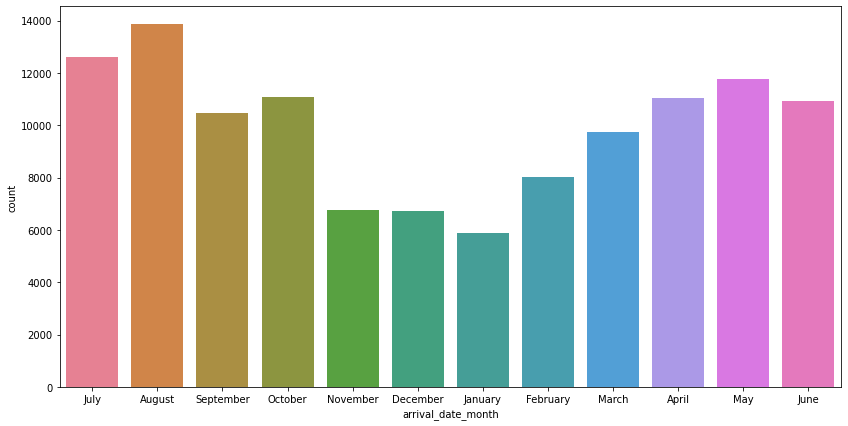

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(df['arrival_date_month'], palette='husl')
plt.show()

Lets check the Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”


In [ ]:
df.market_segment.value_counts(normalize=True)

Online TA        0.474373
Offline TA/TO    0.203199
Groups           0.166580
Direct           0.104695
Corporate        0.042986
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

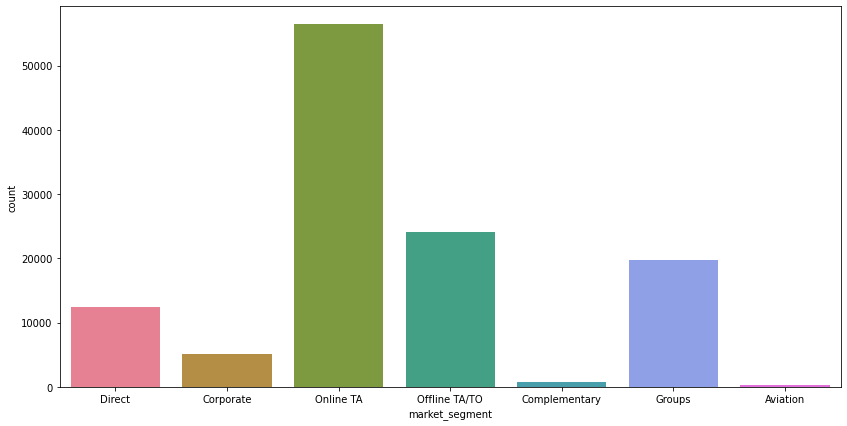

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(df['market_segment'], palette='husl')
plt.show()


Year of arrival date


In [ ]:

df.arrival_date_year.value_counts(normalize=True)

2016    0.474651
2017    0.341503
2015    0.183847
Name: arrival_date_year, dtype: float64

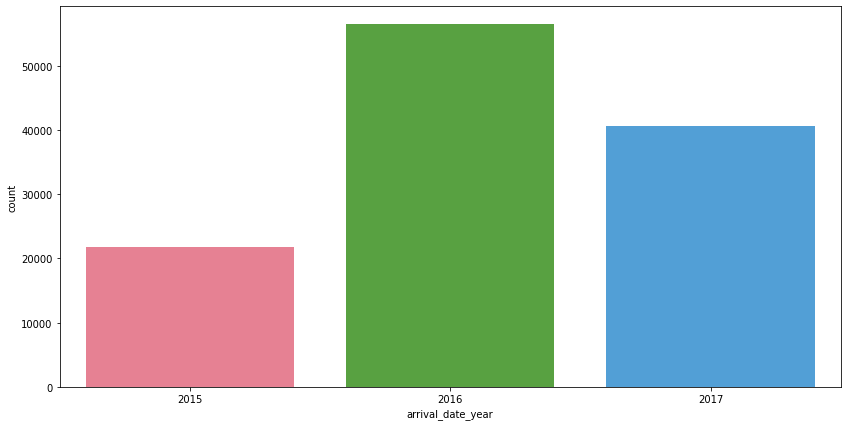

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(df['arrival_date_year'], palette='husl')
plt.show()

Type of meal booked. Categories are presented in standard hospitality meal packages:
Undefined/SC — no meal package;
BB — Bed & Breakfast;
HB — Half board (breakfast and one other meal — usually dinner);
FB — Full board (breakfast, lunch and dinner)

In [ ]:
df.meal.value_counts(normalize=True)

BB           0.772620
HB           0.121398
SC           0.089472
Undefined    0.009798
FB           0.006712
Name: meal, dtype: float64

Type of booking, assuming one of four categories:
Contract — when the booking has an allotment or other type of contract associated to it;
Group — when the booking is associated to a group;
Transient — when the booking is not part of a group or contract, and is not associated to other transient booking;
Transient-party — when the booking is transient, but is associated to at least other transient booking


In [ ]:
df.customer_type.value_counts(normalize=True)

Transient          0.750004
Transient-Party    0.210920
Contract           0.034281
Group              0.004794
Name: customer_type, dtype: float64

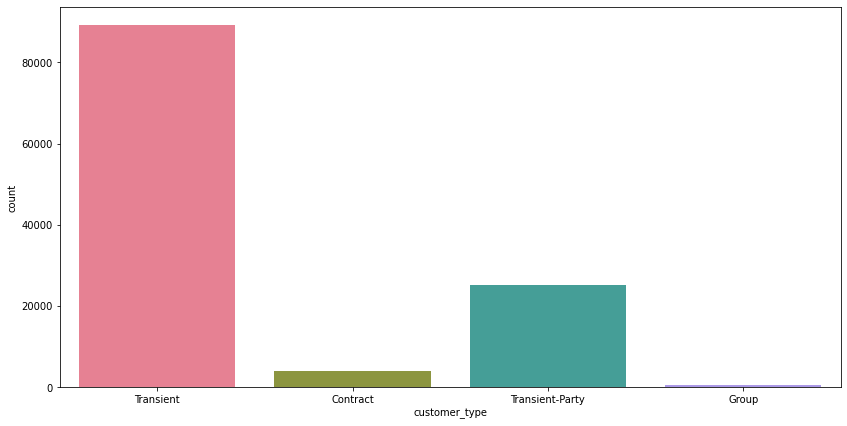

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(df['customer_type'], palette='husl')
plt.show()


Code of room type reserved. Code is presented instead of designation for anonymity reasons.

In [ ]:
df.reserved_room_type.value_counts(normalize=True)

A    0.719953
D    0.161256
E    0.054643
F    0.024307
G    0.017519
B    0.009369
C    0.007830
H    0.005055
L    0.000050
P    0.000017
Name: reserved_room_type, dtype: float64

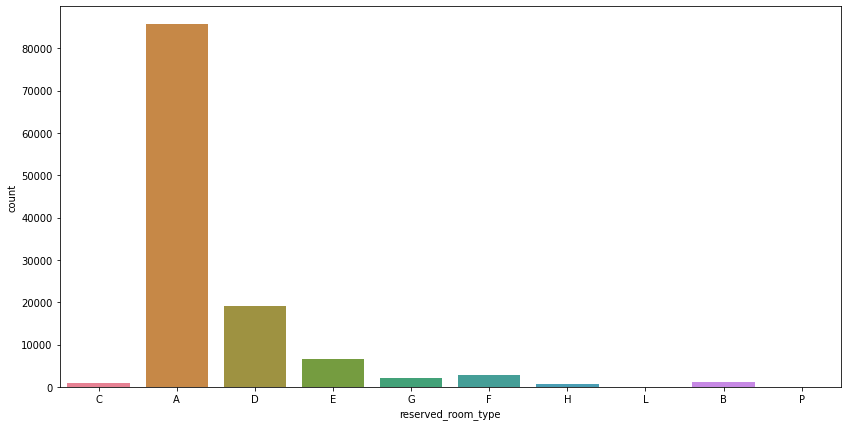

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(df['reserved_room_type'], palette='husl')
plt.show()

Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

In [ ]:
df.assigned_room_type.value_counts(normalize=True)

A    0.621230
D    0.211660
E    0.065081
F    0.031388
G    0.021354
C    0.019798
B    0.018158
H    0.005955
I    0.003003
K    0.002347
P    0.000017
L    0.000008
Name: assigned_room_type, dtype: float64

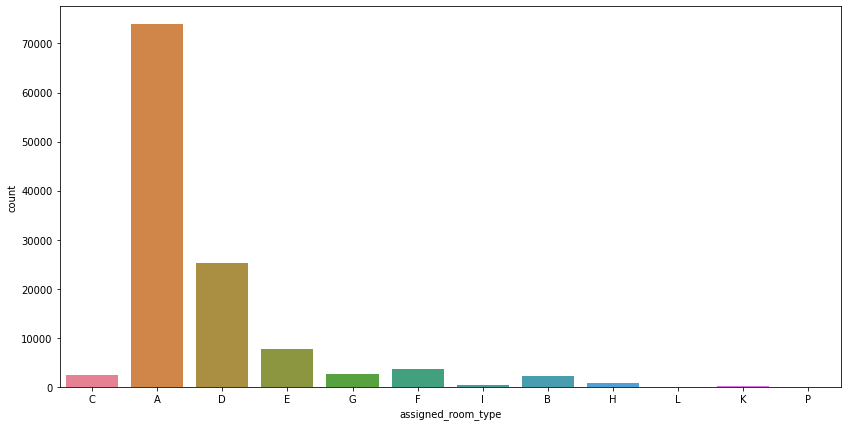

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(df['assigned_room_type'], palette='husl')
plt.show()

Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation


In [ ]:
df.booking_changes.value_counts(normalize=True)

0    0.848643
1    0.106301
2    0.031876
3    0.007780
4    0.003154
5    0.002246
Name: booking_changes, dtype: float64

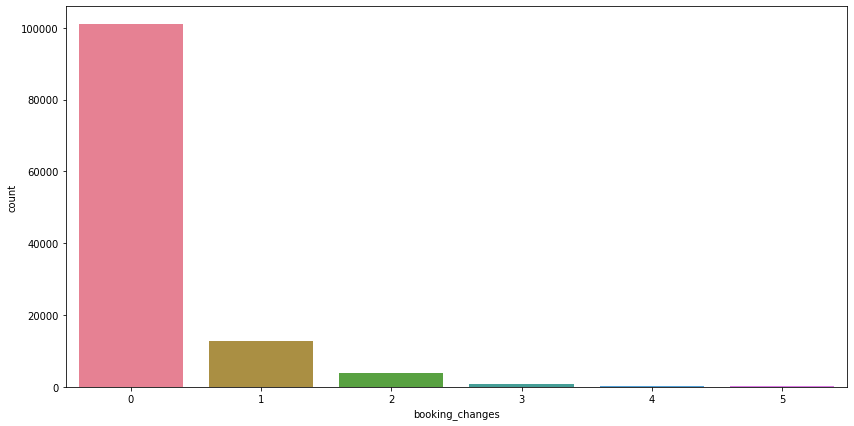

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(df['booking_changes'], palette='husl')
plt.show()


Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

In [ ]:
df.distribution_channel.value_counts(normalize=True)

TA/TO        0.821965
Direct       0.121810
Corporate    0.054593
GDS          0.001623
Undefined    0.000008
Name: distribution_channel, dtype: float64

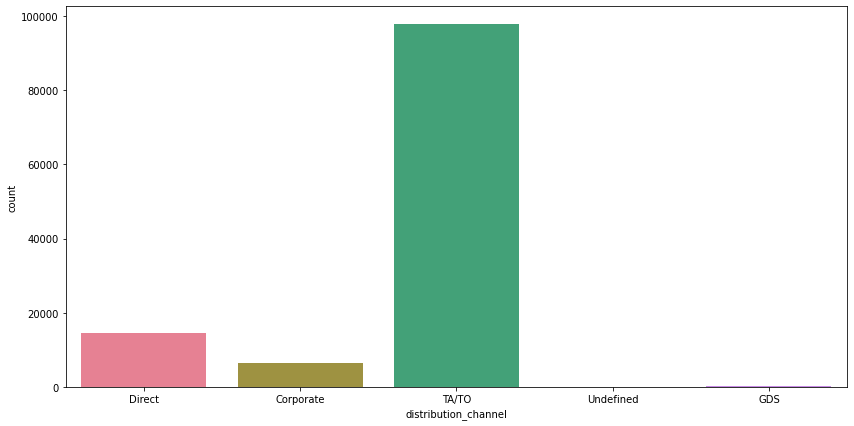

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(df['distribution_channel'], palette='husl')
plt.show()


Check if the booking name was from a repeated guest (1) or not (0)


In [ ]:
df.is_repeated_guest.value_counts(normalize=True)

0    0.967989
1    0.032011
Name: is_repeated_guest, dtype: float64

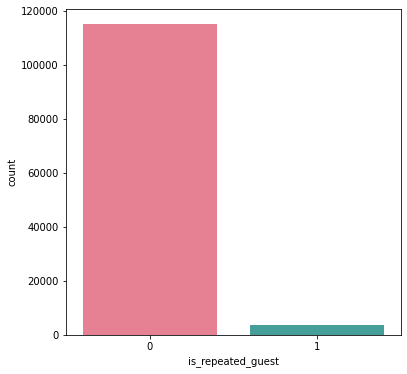

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(df['is_repeated_guest'], palette='husl')
plt.show()


Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:
No Deposit — no deposit was made;
Non Refund — a deposit was made in the value of the total stay cost;
Refundable — a deposit was made with a value under the total cost of stay.


In [ ]:
df.deposit_type.value_counts(normalize=True)

No Deposit    0.876070
Non Refund    0.122567
Refundable    0.001363
Name: deposit_type, dtype: float64

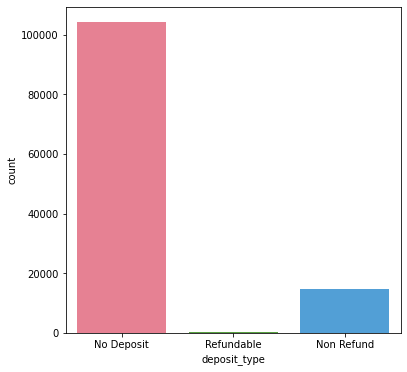

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(df['deposit_type'], palette='husl')
plt.show()

Number of car parking spaces required by the customer.


In [ ]:
df.required_car_parking_spaces.value_counts(normalize=True)

0    0.938536
1    0.061204
2    0.000235
3    0.000025
Name: required_car_parking_spaces, dtype: float64

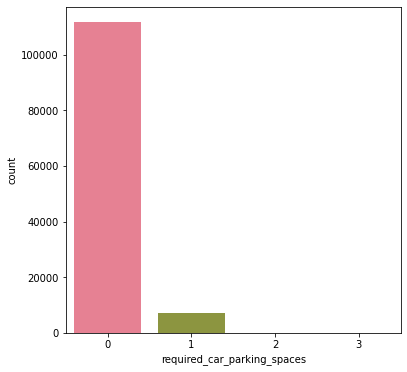

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(df['required_car_parking_spaces'], palette='husl')
plt.show()

Total members per reservation

In [ ]:
df.total_members.value_counts(normalize=True)

2.0    0.688674
1.0    0.187472
3.0    0.088134
4.0    0.033154
0.0    0.001430
5.0    0.001135
Name: total_members, dtype: float64

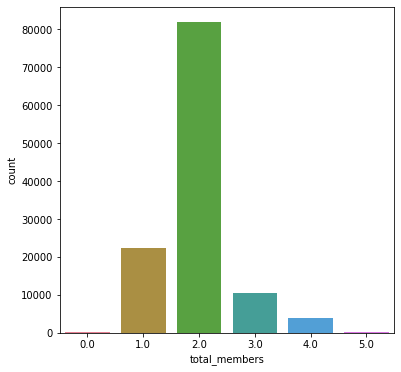

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(df['total_members'], palette='husl')
plt.show()


Reservation last status, assuming one of three categories:
Canceled — booking was canceled by the customer;
Check-Out — customer has checked in but already departed;
No-Show — customer did not check-in and did inform the hotel of the reason why


In [ ]:
df.reservation_status.value_counts(normalize=True)

Check-Out    0.628648
Canceled     0.361234
No-Show      0.010118
Name: reservation_status, dtype: float64

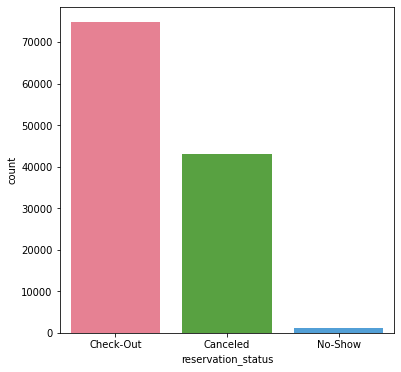

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(df['reservation_status'], palette='husl')
plt.show()

Lets see the proportion of reservations between hotel types.



In [ ]:
df.hotel.value_counts(normalize=True)

City Hotel      0.666975
Resort Hotel    0.333025
Name: hotel, dtype: float64

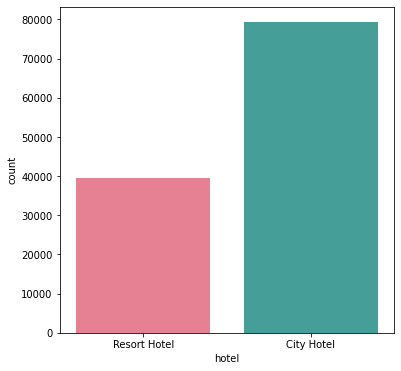

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(df['hotel'], palette='husl')
plt.show()

Relation between prices and month

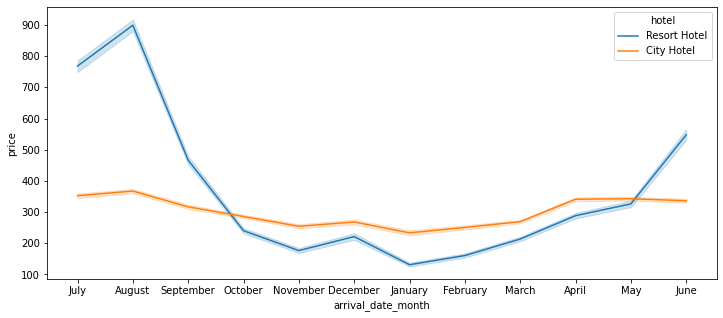

In [ ]:
plt.figure(figsize=(12,5))

# Calculating average daily rate per person
df['adr_pp'] = df['adr'] / (df['adults'] + df['children']) 
actual_guests = df.loc[df["is_canceled"] == '0']
actual_guests['price'] = actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])
sns.lineplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel')
plt.show()

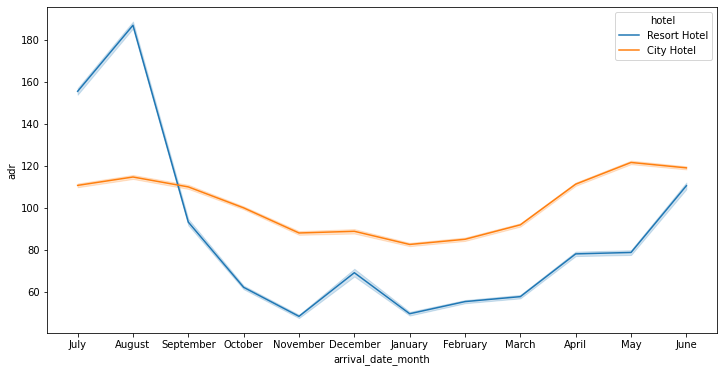

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= df)
plt.show()

For resort hotels, the average daily rate is more expensive during august, july and september.
For city hotels, the average daily rate is more expensive during august, july, june and may.

Which are the three most common and uncommon countries of origin?


In [ ]:
print(df.country.value_counts().head(3))
print('-'*50)
print('\n Most uncommon countries:')
print(df.country.value_counts().tail(35))

PRT    48586
GBR    12129
FRA    10415
Name: country, dtype: int64
--------------------------------------------------

 Most uncommon countries:
TGO    2
UGA    2
KNA    2
RWA    2
SYC    2
KIR    1
SDN    1
NCL    1
AIA    1
ASM    1
FJI    1
ATF    1
LCA    1
GUY    1
PYF    1
DMA    1
SLE    1
MRT    1
NIC    1
BDI    1
PLW    1
MLI    1
CYM    1
BFA    1
MDG    1
MMR    1
NPL    1
BHS    1
UMI    1
SMR    1
DJI    1
BWA    1
HND    1
VGB    1
NAM    1
Name: country, dtype: int64


As we can see, Portugal tops the list with 48,586 of the cases, followed by Great Britain with 12,129 and France with 10,415.
There are 30 countries that can be considered as the most uncommon country of origin, with 1 guest per country. Among these, we have Madagascar, Dominica, Mali, Guyana, Palau, Kiribati, Sudan, etc.
2. Which are the months of highest and least occupation?

In [ ]:
df.arrival_date_month.value_counts(normalize=True)

August       0.116503
July         0.106209
May          0.099068
October      0.093315
April        0.092895
June         0.091902
September    0.088033
March        0.081911
February     0.067385
November     0.056788
December     0.056586
January      0.049404
Name: arrival_date_month, dtype: float64

The month of highest occupation is august with 11.65% of the reservations. The month of lest occupation is january with 4.94% of the reservations. 3. What is the most popular meal package?

In [ ]:
df.meal.value_counts(normalize=True)

BB           0.772620
HB           0.121398
SC           0.089472
Undefined    0.009798
FB           0.006712
Name: meal, dtype: float64

The Bed & Breakfast option is the most popular, with a frequency of 77.26%.
4. Which is the most reserved room type?

In [ ]:
df.reserved_room_type.value_counts(normalize=True)

A    0.719953
D    0.161256
E    0.054643
F    0.024307
G    0.017519
B    0.009369
C    0.007830
H    0.005055
L    0.000050
P    0.000017
Name: reserved_room_type, dtype: float64

The “A” room type is the most popular among the clients, with 71.99% of the reservations.
5. How many bookings changes have been done during the studied period?


In [ ]:
df.booking_changes.sum()

25829

There were 25,829 registered changes in the bookings during this period.
6. How many people have been registered in the hotel?

In [ ]:
df.total_members.sum()

233934.0

233,934 people have been registered in the hotel.
7. How many car parking spaces have been used?

In [ ]:
df.required_car_parking_spaces.sum()

7342

7,342 car parking spaces have been used.
8. What is the most common customer type?

In [ ]:
df.customer_type.value_counts(normalize=True)

Transient          0.750004
Transient-Party    0.210920
Contract           0.034281
Group              0.004794
Name: customer_type, dtype: float64

Trasients are the most common customer type, they represent 75% of the total customers.

Inferences and Conclusion
The majority of guests come from western europe countries.
the majority of reservations are for city hotels.
The number of repeated guests is too low.
The majority of reservations converts into successful transactions.